In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Lade Datensets
fpoe_davor = pd.read_csv("fpoe_davor.csv", parse_dates=[0], index_col=0)
fpoe_danach = pd.read_csv("fpoe_danach.csv", parse_dates=[0], index_col=0)

gruene_davor = pd.read_csv("gruene_davor.csv", parse_dates=[0], index_col=0)
gruene_danach = pd.read_csv("gruene_danach.csv", parse_dates=[0], index_col=0)

spoe_davor = pd.read_csv("spoe_davor.csv", parse_dates=[0], index_col=0)
spoe_danach = pd.read_csv("spoe_danach.csv", parse_dates=[0], index_col=0)

In [3]:
fpoe_davor_monat = fpoe_davor['Sentiment Score']
fpoe_davor_monat = fpoe_davor_monat.resample('ME').mean()
display(fpoe_davor_monat)

fpoe_danach_monat = fpoe_danach['Sentiment Score']
fpoe_danach_monat = fpoe_danach_monat.resample('ME').mean()
display(fpoe_danach_monat)

Datum
2016-12-31    1.925621
2017-01-31    1.853867
2017-02-28    1.893510
2017-03-31    1.854954
2017-04-30    1.869786
2017-05-31    1.824571
2017-06-30    1.850476
2017-07-31    1.801874
2017-08-31    1.856716
2017-09-30    1.867409
2017-10-31    1.800621
2017-11-30    1.922464
2017-12-31    1.843195
Freq: ME, Name: Sentiment Score, dtype: float64

Datum
2017-12-31    1.832645
2018-01-31    1.791905
2018-02-28    1.833248
2018-03-31    1.755239
2018-04-30    1.809355
2018-05-31    1.849709
2018-06-30    1.762502
2018-07-31    1.781009
2018-08-31    1.797313
2018-09-30    1.773125
2018-10-31    1.824992
2018-11-30    1.775596
2018-12-31    1.802144
Freq: ME, Name: Sentiment Score, dtype: float64

In [4]:
gruene_davor_monat = gruene_davor['Sentiment Score']
gruene_davor_monat = gruene_davor_monat.resample('ME').mean()
display(gruene_davor_monat)

gruene_danach_monat = gruene_danach['Sentiment Score']
gruene_danach_monat = gruene_danach_monat.resample('ME').mean()
display(gruene_danach_monat)

Datum
2019-01-31    1.761362
2019-02-28    1.739513
2019-03-31    1.706492
2019-04-30    1.794565
2019-05-31    1.809223
2019-06-30    1.803101
2019-07-31    1.748677
2019-08-31    1.840348
2019-09-30    1.813649
2019-10-31    1.809616
2019-11-30    1.873108
2019-12-31    1.894290
2020-01-31    1.984808
Freq: ME, Name: Sentiment Score, dtype: float64

Datum
2020-01-31    2.007501
2020-02-29    1.903329
2020-03-31    1.920191
2020-04-30    1.941375
2020-05-31    1.954010
2020-06-30    1.909351
2020-07-31    1.974594
2020-08-31    1.922538
2020-09-30    1.907158
2020-10-31    1.948693
2020-11-30    1.877380
2020-12-31    1.927248
2021-01-31    1.729779
Freq: ME, Name: Sentiment Score, dtype: float64

In [5]:
spoe_davor_monat = spoe_davor['Sentiment Score']
spoe_davor_monat = spoe_davor_monat.resample('ME').mean()
display(spoe_davor_monat)

spoe_danach_monat = spoe_danach['Sentiment Score']
spoe_danach_monat = spoe_danach_monat.resample('ME').mean()
display(spoe_danach_monat)

Datum
2006-01-31    1.842841
2006-02-28    1.825977
2006-03-31    1.841818
2006-04-30    1.832044
2006-05-31    1.840365
2006-06-30    1.867621
2006-07-31    1.820005
2006-08-31    1.839949
2006-09-30    1.833701
2006-10-31    1.927562
2006-11-30    1.909376
2006-12-31    1.904532
2007-01-31    1.960668
Freq: ME, Name: Sentiment Score, dtype: float64

Datum
2007-01-31    1.926471
2007-02-28    1.939749
2007-03-31    1.967023
2007-04-30    1.933056
2007-05-31    1.953217
2007-06-30    1.933964
2007-07-31    1.954608
2007-08-31    1.950562
2007-09-30    1.954567
2007-10-31    1.952093
2007-11-30    1.953736
2007-12-31    1.930646
2008-01-31    1.980221
Freq: ME, Name: Sentiment Score, dtype: float64

In [6]:
def avg_std_davor_danach(data_davor: pd.DataFrame, data_danach: pd.DataFrame):
    avg_davor = data_davor['Sentiment Score'].mean()
    std_davor = data_davor['Sentiment Score'].std()

    avg_danach = data_danach['Sentiment Score'].mean()
    std_danach = data_danach['Sentiment Score'].std()

    print(f"{data_davor['Partei'].iloc[0]}-Durchschnitt vor der Angelobung: {avg_davor}")
    print(f"{data_davor['Partei'].iloc[0]}-Standard-Abweichung vor der Angelobung: {std_davor}")
    print("")
    print(f"{data_danach['Partei'].iloc[0]}-Durchschnitt nach der Angelobung: {avg_danach}")
    print(f"{data_danach['Partei'].iloc[0]}-Standard-Abweichung nach der Angelobung: {std_danach}")

    return avg_davor, std_danach, avg_danach, std_danach

In [7]:
fpoe_davor_avg, fpoe_davor_std, fpoe_danach_avg, fpoe_danach_std = avg_std_davor_danach(fpoe_davor, fpoe_danach)

FPÖ-Durchschnitt vor der Angelobung: 1.8529467401817257
FPÖ-Standard-Abweichung vor der Angelobung: 0.28902507811220624

FPÖ-Durchschnitt nach der Angelobung: 1.7959041512335423
FPÖ-Standard-Abweichung nach der Angelobung: 0.3412700224780644


In [8]:
gruene_davor_avg, gruene_davor_std, gruene_danach_avg, gruene_danach_std = avg_std_davor_danach(gruene_davor, gruene_danach)

Grüne-Durchschnitt vor der Angelobung: 1.7986873397033392
Grüne-Standard-Abweichung vor der Angelobung: 0.33647979942019834

Grüne-Durchschnitt nach der Angelobung: 1.9289592428011846
Grüne-Standard-Abweichung nach der Angelobung: 0.2094302399380128


In [9]:
spoe_davor_avg, spoe_davor_std, spoe_danach_avg, spoe_danach_std = avg_std_davor_danach(spoe_davor, spoe_danach)

SPÖ-Durchschnitt vor der Angelobung: 1.8519701919659184
SPÖ-Standard-Abweichung vor der Angelobung: 0.29403751382775684

SPÖ-Durchschnitt nach der Angelobung: 1.9478541526190172
SPÖ-Standard-Abweichung nach der Angelobung: 0.1671016644248763


In [10]:
# Berechne den t-test
def t_test_partei(data_davor: pd.DataFrame, data_danach: pd.DataFrame):
    group1 = np.array(data_davor['Sentiment Score'])
    group2 = np.array(data_danach['Sentiment Score'])
    
    # t-Test durchführen
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test (ungleiche Varianzen)
    print(f"T-Wert für {data_davor['Partei'].iloc[0]}: {t_stat:.3f}, p-Wert: {p_value:.3f}")

    return t_stat, p_value

In [11]:
t_stat_fpoe, p_value_fpoe = t_test_partei(fpoe_davor, fpoe_danach)

T-Wert für FPÖ: 3.926, p-Wert: 0.000


In [12]:
t_stat_gruene, p_value_gruene = t_test_partei(gruene_davor, gruene_danach)

T-Wert für Grüne: -7.043, p-Wert: 0.000


In [13]:
t_stat_spoe, p_value_spoe = t_test_partei(spoe_davor, spoe_danach)

T-Wert für SPÖ: -19.413, p-Wert: 0.000


In [14]:
def daten_gesamt_zeit(data_davor: pd.DataFrame, data_danach: pd.DataFrame, intervall: str):
    daten_gesamt = pd.concat([data_davor, data_danach], axis=0)
    daten_gesamt = daten_gesamt['Sentiment Score']
    daten_gesamt = daten_gesamt.resample(intervall, origin='end').mean()

    return daten_gesamt

In [15]:
fpoe_gesamt_monat = daten_gesamt_zeit(fpoe_davor, fpoe_danach, 'ME')
display(fpoe_gesamt_monat)

Datum
2016-12-31    1.925621
2017-01-31    1.853867
2017-02-28    1.893510
2017-03-31    1.854954
2017-04-30    1.869786
2017-05-31    1.824571
2017-06-30    1.850476
2017-07-31    1.801874
2017-08-31    1.856716
2017-09-30    1.867409
2017-10-31    1.800621
2017-11-30    1.922464
2017-12-31    1.835659
2018-01-31    1.791905
2018-02-28    1.833248
2018-03-31    1.755239
2018-04-30    1.809355
2018-05-31    1.849709
2018-06-30    1.762502
2018-07-31    1.781009
2018-08-31    1.797313
2018-09-30    1.773125
2018-10-31    1.824992
2018-11-30    1.775596
2018-12-31    1.802144
Freq: ME, Name: Sentiment Score, dtype: float64

In [16]:
gruene_gesamt_monat = daten_gesamt_zeit(gruene_davor, gruene_danach, 'ME')
display(gruene_gesamt_monat)

Datum
2019-01-31    1.761362
2019-02-28    1.739513
2019-03-31    1.706492
2019-04-30    1.794565
2019-05-31    1.809223
2019-06-30    1.803101
2019-07-31    1.748677
2019-08-31    1.840348
2019-09-30    1.813649
2019-10-31    1.809616
2019-11-30    1.873108
2019-12-31    1.894290
2020-01-31    2.005438
2020-02-29    1.903329
2020-03-31    1.920191
2020-04-30    1.941375
2020-05-31    1.954010
2020-06-30    1.909351
2020-07-31    1.974594
2020-08-31    1.922538
2020-09-30    1.907158
2020-10-31    1.948693
2020-11-30    1.877380
2020-12-31    1.927248
2021-01-31    1.729779
Freq: ME, Name: Sentiment Score, dtype: float64

In [17]:
spoe_gesamt_monat = daten_gesamt_zeit(spoe_davor, spoe_danach, 'ME')
display(spoe_gesamt_monat)

Datum
2006-01-31    1.842841
2006-02-28    1.825977
2006-03-31    1.841818
2006-04-30    1.832044
2006-05-31    1.840365
2006-06-30    1.867621
2006-07-31    1.820005
2006-08-31    1.839949
2006-09-30    1.833701
2006-10-31    1.927562
2006-11-30    1.909376
2006-12-31    1.904532
2007-01-31    1.937428
2007-02-28    1.939749
2007-03-31    1.967023
2007-04-30    1.933056
2007-05-31    1.953217
2007-06-30    1.933964
2007-07-31    1.954608
2007-08-31    1.950562
2007-09-30    1.954567
2007-10-31    1.952093
2007-11-30    1.953736
2007-12-31    1.930646
2008-01-31    1.980221
Freq: ME, Name: Sentiment Score, dtype: float64

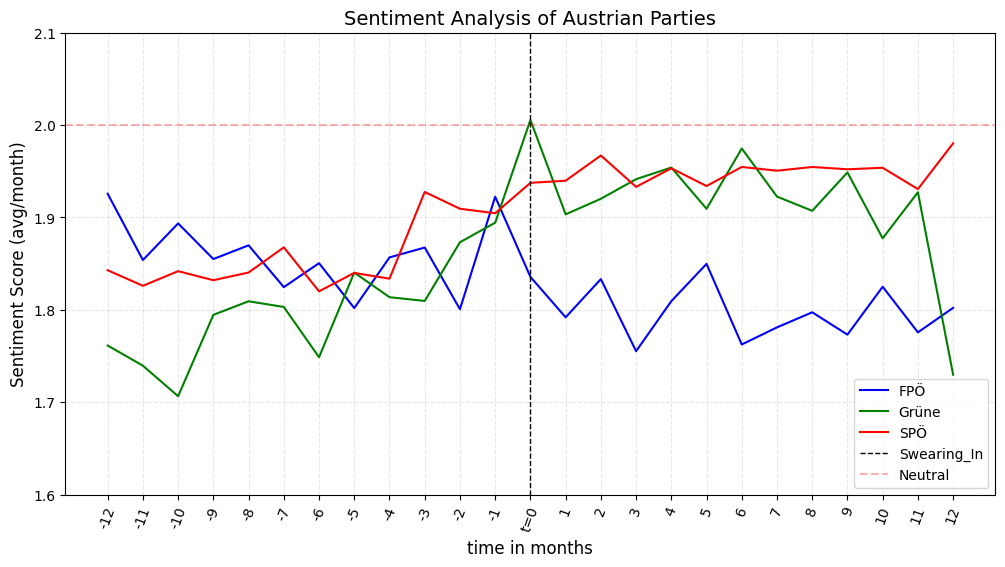

In [18]:
x_values = list(range(-12, 13))
for idx, x in enumerate(x_values):
    if x == 0:
        x_values[idx] = 't=0'
    else:
        x_values[idx] = str(x_values[idx]) #+ ' Monate'


plt.figure(figsize=(12, 6))

plt.plot(x_values, fpoe_gesamt_monat.values, linestyle='-', color='b', label='FPÖ')
plt.plot(x_values, gruene_gesamt_monat.values, linestyle='-', color='g', label='Grüne' )
plt.plot(x_values, spoe_gesamt_monat.values, linestyle='-', color='r', label='SPÖ' )

# Diagrammbeschriftungen und Titel
plt.title('Sentiment Analysis of Austrian Parties', fontsize=14)
plt.ylabel('Sentiment Score (avg/month)', fontsize=12)
plt.xlabel('time in months', fontsize=12)
plt.axvline(x="t=0", color='black', linestyle='--', linewidth=1, label="Swearing_In")
plt.ylim(1.6, 2.1)
plt.axhline(y=2, color='red', linestyle='--', alpha=.3, label='Neutral')
plt.tick_params(axis='x', rotation=70)

# Gitter und Legende hinzufügen
plt.grid(True, linestyle='--', alpha=.3)
plt.legend(fontsize=10)

# Diagramm anzeigen
plt.show()

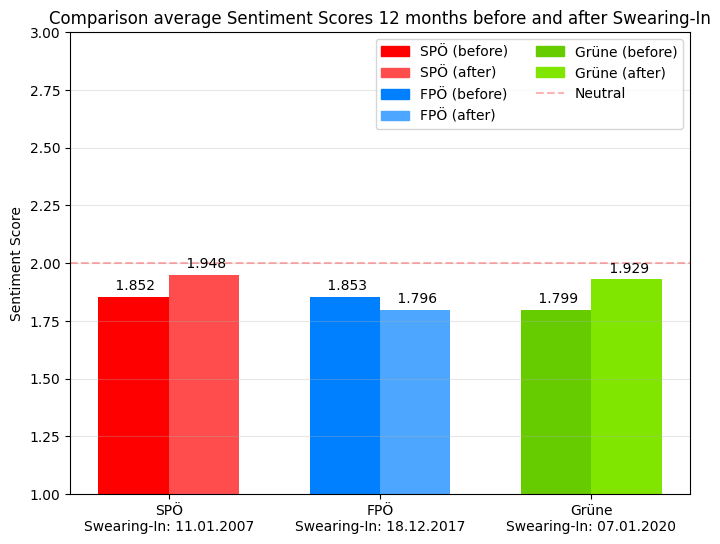

In [19]:
avg_dict = {'SPÖ': [spoe_davor_avg, spoe_danach_avg],
            'FPÖ': [fpoe_davor_avg, fpoe_danach_avg],
            'Grüne': [gruene_davor_avg ,gruene_danach_avg]}

labels = ['Vor Angelobung', 'Nach Angelobung']
bar_position = np.array([0, 0.75, 1.5])
breite = 0.25
multiplier = 0

farben_davor = ['#FF0000', '#0080FF', '#66CC00']
farben_danach = ['#FF4D4D', '#4DA6FF', '#80E600']

fig, ax = plt.subplots(figsize=(8, 6))
bar_davor = ax.bar(bar_position - breite/2, [d[0] for d in avg_dict.values()], breite, label=labels[0], color=farben_davor)
bar_danach = ax.bar(bar_position + breite/2, [d[1] for d in avg_dict.values()], breite, label=labels[1], color=farben_danach)

def werte_bars(set_bars):
    for bar in set_bars:
        height = bar.get_height()
        ax.annotate(f'{height: .3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

werte_bars(bar_davor)
werte_bars(bar_danach)

legende_elemente = []
for i, (partei, farbie) in enumerate(zip(avg_dict.keys(), zip(farben_davor, farben_danach))):
    legende_elemente.append(plt.Rectangle((0,0),1,1, color=farben_davor[i], label=f'{partei} (before)'))
    legende_elemente.append(plt.Rectangle((0,0),1,1, color=farben_danach[i], label=f'{partei} (after)'))

legende_elemente.append(plt.Line2D([0], [0], color='red', linestyle='--', alpha=.3, label='Neutral'))

x_elemente = ['SPÖ\nSwearing-In: 11.01.2007', 'FPÖ\nSwearing-In: 18.12.2017', 'Grüne\nSwearing-In: 07.01.2020']

ax.set_ylabel('Sentiment Score')
ax.set_title('Comparison average Sentiment Scores 12 months before and after Swearing-In')
ax.set_xticks(bar_position)
ax.set_xticklabels(x_elemente)
plt.legend(handles=legende_elemente, loc='upper right', ncols=2)
plt.axhline(y=2, color='red', linestyle='--', alpha=.3, label='Neutral')
plt.ylim(1, 3)
plt.grid(axis='y', alpha=.3)

plt.show()

In [20]:
spoe_pro = spoe_danach_avg / spoe_davor_avg
fpoe_pro = fpoe_danach_avg / fpoe_davor_avg
gruene_pro = gruene_danach_avg / gruene_davor_avg

print(spoe_pro)
print(1-fpoe_pro)
print(gruene_pro)

1.0517740302025678
0.030784796838029482
1.0724260966440846
